In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, roc_curve, auc
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model, neighbors
from sklearn.utils import shuffle
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import fetch_mldata 
from imblearn.over_sampling import SMOTE
import pylab
import scipy.stats as stats

%matplotlib inline
import sklearn.datasets
from sklearn.datasets import load_iris
from sklearn import tree

np.random.seed = 8

In [3]:
def showRocGraph(y_test, y_hat):
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='KNN ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
df = pd.read_csv('Caravan.csv')

In [127]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [128]:
df.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MOSTYPE,1.000000,-0.038721,-0.021997,0.009454,0.992672,-0.193613,0.090399,-0.025642,-0.019505,-0.065596,...,-0.028829,0.021707,-0.012060,-0.002909,-0.011512,0.007801,-0.018162,-0.015774,-0.021087,-0.053718
MAANTHUI,-0.038721,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,...,0.020926,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166
MGEMOMV,-0.021997,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,...,0.017428,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384
MGEMLEEF,0.009454,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,...,-0.025187,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540
MOSHOOFD,0.992672,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,...,-0.027240,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723
MGODRK,-0.193613,-0.006136,0.013105,-0.037519,-0.199186,1.000000,-0.372767,0.021125,-0.063904,-0.028594,...,0.003793,-0.008450,0.005386,-0.012843,0.001928,-0.000675,0.011795,-0.001503,-0.011431,-0.004009
MGODPR,0.090399,-0.024360,0.049356,0.093654,0.098493,-0.372767,1.000000,-0.317549,-0.741895,0.147256,...,-0.018459,-0.014355,0.003949,0.003975,0.046352,0.013760,0.018468,0.001906,0.002392,0.016658
MGODOV,-0.025642,0.012056,-0.108650,0.057737,-0.034566,0.021125,-0.317549,1.000000,-0.139306,-0.125703,...,0.003050,0.006572,-0.005569,0.017696,0.006302,-0.023877,0.009417,0.025661,-0.009734,0.010127
MGODGE,-0.019505,0.020540,-0.005527,-0.119966,-0.021466,-0.063904,-0.741895,-0.139306,1.000000,-0.107900,...,0.010169,0.008844,0.004242,-0.004139,-0.052605,-0.008412,-0.026407,-0.011122,0.007261,-0.027291
MRELGE,-0.065596,0.023025,0.534798,-0.040384,-0.026619,-0.028594,0.147256,-0.125703,-0.107900,1.000000,...,0.015056,0.011512,0.022376,0.011678,-0.007979,0.009711,-0.001566,0.020921,-0.003420,0.036569


<h4>Find the number of columns that have 0s within 50 of row length</h4>

In [129]:
arr = []
for item in df.columns:
    a = df[item].value_counts()
    try: 
        if a[0] >= df.shape[0]-50: arr.append(item)
            
    except:
        pass

for item in arr:
    print(item)

PBESAUT
PVRAAUT
PWERKT
PPERSONG
PGEZONG
PWAOREG
PZEILPL
PPLEZIER
PINBOED
ABESAUT
AVRAAUT
AWERKT
APERSONG
AGEZONG
AWAOREG
AZEILPL
APLEZIER
AINBOED


<h4>Split out purchases from the data frame</h4>

In [9]:
x = df.drop(['Purchase'], axis=1)
y = df.Purchase
y = y.apply(lambda x : 1 if x == 'Yes' else 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [131]:
df['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

<h4>Linear Regression</h4>

In [132]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.0535130406645


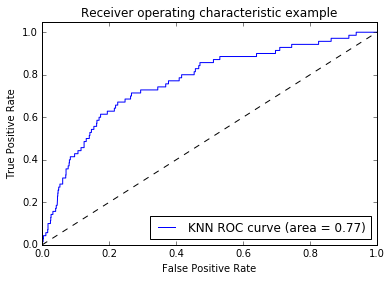

In [133]:
y_hat = lm.predict(x_test)
print(mean_squared_error(y_test, y_hat))
showRocGraph(y_test, y_hat)

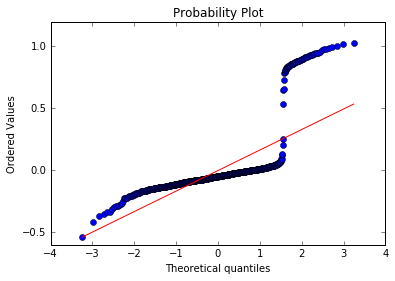

In [134]:
(a, r) = stats.probplot(y_test-y_hat, dist="norm", plot=pylab)
pylab.show()

<h4>K Neighbors</h4>

In [12]:
params = {'n_neighbors': np.arange(2, 20)}
kNeighborsModel = neighbors.KNeighborsClassifier()
knn = GridSearchCV(kNeighborsModel, param_grid=params, scoring='accuracy', cv=5)
knn.fit(x_train, y_train)
y_hatNeighbors = knn.predict(x_test)
print (mean_squared_error(y_hatNeighbors, y_test))
confusion_matrix(y_hatNeighbors, y_test)

0.0583690987124


array([[1097,   67],
       [   1,    0]])

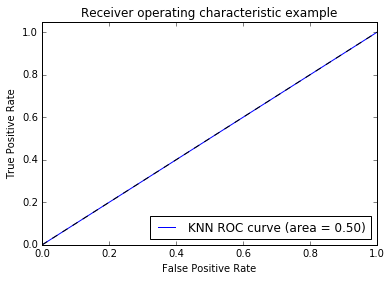

In [136]:
showRocGraph(y_test, y_hatNeighbors)

<h4>Tranform data set with Smote</h4>

In [14]:
sm = SMOTE(random_state=42)
smox, smoy = sm.fit_sample(x_train, y_train)

In [15]:
knn.fit(smox, smoy)
y_hatNeighbors = knn.predict(x_test)
mean_squared_error(y_hatNeighbors, y_test)

0.13047210300429185

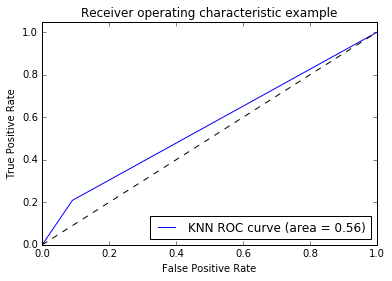

[[999  53]
 [ 99  14]]


0.12389380530973451

In [17]:
showRocGraph(y_test, y_hatNeighbors)
print (confusion_matrix(y_hatNeighbors, y_test))
14/113

<h4>Random Forest</h4>

In [140]:
rf = RandomForestClassifier(criterion='gini', bootstrap=False, random_state=8)
params = {'n_estimators' : [200], 'max_depth' : [10, None], 'min_samples_split' : [2, 20], 'max_features' : ['auto']}
clf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5)

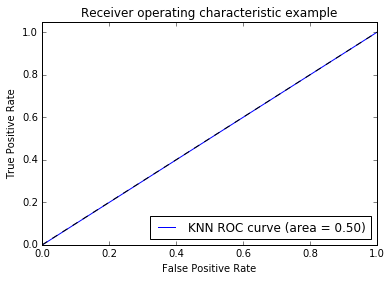

In [141]:
clf.fit(x_train, y_train)
y_hatRF = clf.predict(x_test)
showRocGraph(y_test, y_hatRF)

In [142]:
print (mean_squared_error(y_hatRF, y_test))
confusion_matrix(y_hatRF, y_test)

0.0609442060086


array([[1094,   70],
       [   1,    0]])

<h4>Transform with SMOTE</h4>

In [143]:
clf.fit(smox, smoy)
y_hatRF = clf.predict(x_test)

In [144]:
print (mean_squared_error(y_hatRF, y_test))
cfMatrix = confusion_matrix(y_hatRF, y_test)
cfMatrix

0.0738197424893


array([[1073,   64],
       [  22,    6]])

In [1]:
6/28

0.21428571428571427

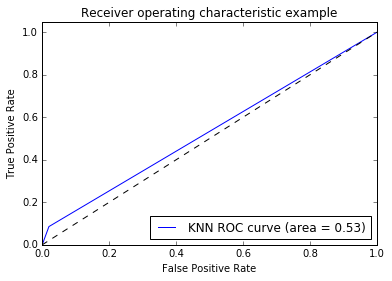

In [146]:
showRocGraph(y_test, y_hatRF)